<a href="https://colab.research.google.com/github/gonzakayunawel/house_prices_analysis_xgboost_regression_model/blob/main/house_prices_analysis_xgboost_regression_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis EDA: Precios Casas Usadas, Región Metropolitana, Chile

## Carga de librerías, módulos y conexión a la base de datos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlalchemy

## EDA

In [2]:
df_uf = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vTXDXY5fH26FMCT2y9yo4jBLfEREsvRm8rYchS1tsNAkfBtVG-QfWoUtKiE_g8NfZTSpf-9VDf6HNDn/pub?output=csv")
df_comunas = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vSgux-D4gAbeNTYKq84Mk12_vH12LUjkK5SuGGpRWb1S2CthhG95mbMoHiD4o4s-bl3KqFg5vgoInWf/pub?output=csv")
df_precio_casas = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vRYhDFWCRQvpWQ3NT--LlKV6WCnTT46F20cVUa3pfnlDTbHDEYCku4cRA_735Wf1tb_M_vlgKcBNLxT/pub?output=csv")

In [3]:
df_uf.shape

(495, 2)

In [4]:
df_uf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495 entries, 0 to 494
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Fecha   495 non-null    object 
 1   Valor   495 non-null    float64
dtypes: float64(1), object(1)
memory usage: 7.9+ KB


In [5]:
df_comunas.shape

(52, 3)

In [6]:
df_comunas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   index      52 non-null     int64 
 1   Comuna     52 non-null     object
 2   Ubicación  52 non-null     object
dtypes: int64(1), object(2)
memory usage: 1.3+ KB


In [7]:
df_precio_casas.shape

(7779, 13)

In [8]:
df_precio_casas.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7779 entries, 0 to 7778
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   index       7779 non-null   int64  
 1   price_clp   7779 non-null   int64  
 2   price_uf    7779 non-null   int64  
 3   price_usd   7779 non-null   int64  
 4   ubicacion   7779 non-null   object 
 5   dorms       7779 non-null   int64  
 6   baths       7714 non-null   float64
 7   built area  7533 non-null   float64
 8   total area  7571 non-null   float64
 9   parking     5489 non-null   float64
 10  id          7779 non-null   int64  
 11  realtor     7184 non-null   object 
 12  comuna_id   7779 non-null   int64  
dtypes: float64(4), int64(7), object(2)
memory usage: 790.2+ KB


## Visualizaciones

In [9]:
df_uf["Fecha"].max()

'2024-05-09'

In [10]:
df_uf["Fecha"].min()

'2023-01-01'

### Valor de UF

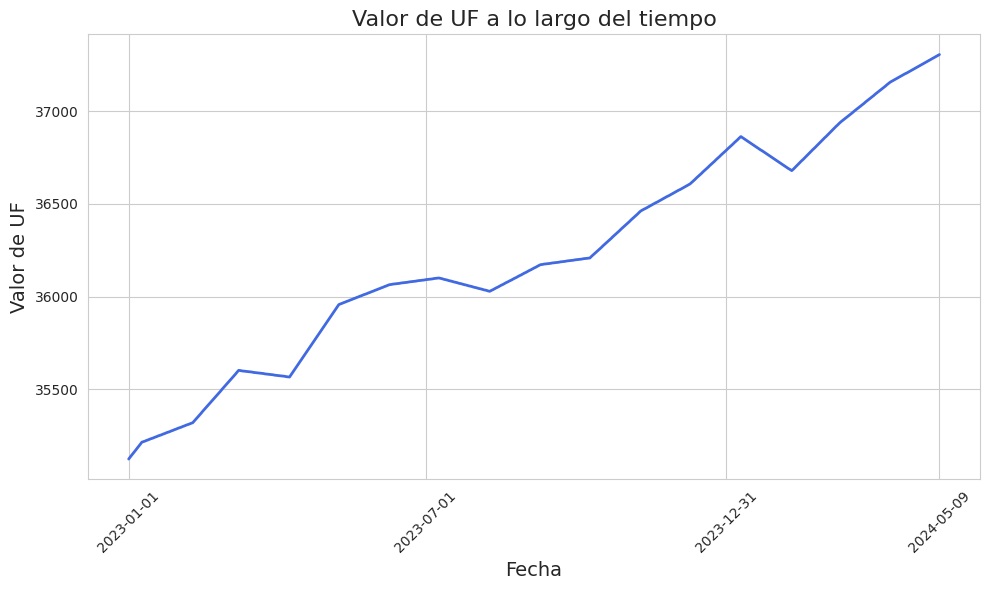

In [11]:
import matplotlib.dates as mdates
from datetime import datetime

sns.set_style("whitegrid")

plt.figure(figsize=(10, 6))
sns.lineplot(
    data=df_uf,
    x="Fecha",
    y="Valor",
    color="royalblue",
    linewidth=2,
)

# Add titles and labels
plt.title("Valor de UF a lo largo del tiempo", fontsize=16)
plt.xlabel("Fecha", fontsize=14)
plt.ylabel("Valor de UF", fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(['2023-01-01', '2023-07-01', '2023-12-31', '2024-05-09'], rotation=45)

# Show plot
plt.tight_layout()
plt.show()

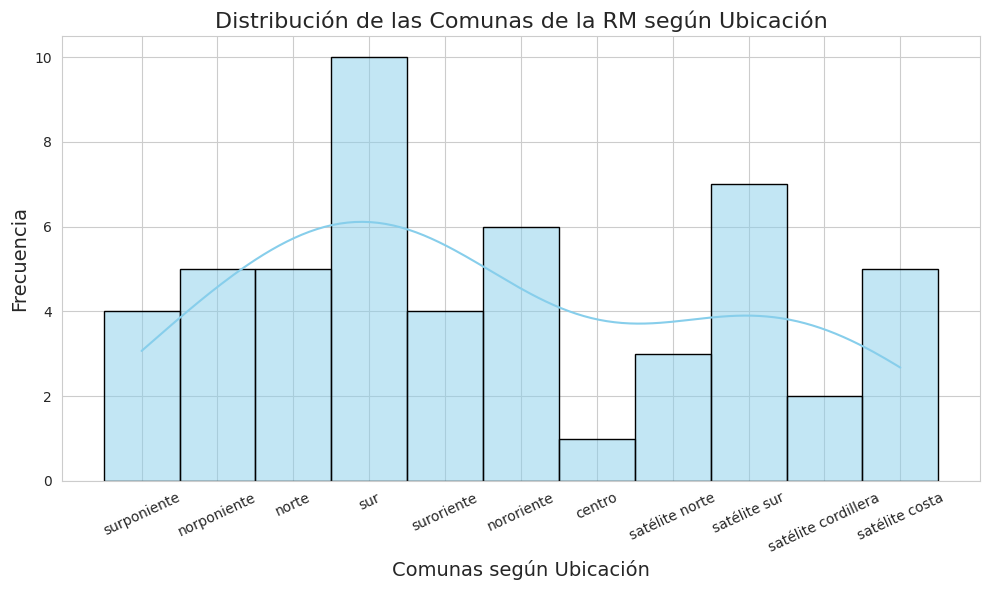

In [12]:
sns.set_style("whitegrid")

plt.figure(figsize=(10, 6))

sns.histplot(data=df_comunas, x='Ubicación', bins=10, kde=True, color='skyblue', edgecolor='black')

# Add titles and labels
plt.title("Distribución de las Comunas de la RM según Ubicación", fontsize=16)
plt.xlabel("Comunas según Ubicación", fontsize=14)
plt.ylabel("Frecuencia", fontsize=14)
plt.xticks(rotation=25)

# Show plot
plt.tight_layout()  # Adjust layout to prevent clipping of labels

## Feature Engineering: Limpiar datos, elminar colummas, normalizar, imputar. DataFrame: Precio Casas Usadas RM

Para el caso de este dataframe, como se observó en el .info(), hay datos nulos, por lo que antes de visualizar se hará limpieza y normalización.

In [13]:
df_precio_casas.columns

Index(['index', 'price_clp', 'price_uf', 'price_usd', 'ubicacion', 'dorms',
       'baths', 'built area', 'total area', 'parking', 'id', 'realtor',
       'comuna_id'],
      dtype='object')

In [14]:
df_precio_casas.head(5)

,index,price_clp,price_uf,price_usd,ubicacion,dorms,baths,built area,total area,parking,id,realtor,comuna_id
0,0,409285000,11500,509695,Hoevel4548y4558,7,4.0,384.0,732.0,3.0,11700213,NaN,26
1,1,105000000,2950,130760,Rucalhue,2,1.0,112.0,145.0,1.0,10894299,Legales y Propiedades SpA,20
2,2,128124000,3600,159557,AvenidaLasParcelas,3,1.0,59.0,243.0,2.0,10257635,Propiedadesrs,4
3,3,75000000,2107,93400,PasajeGonzaloRojas,3,1.0,103.0,73.0,1.0,9232092,Patricio Gajardo propiedades,35
4,4,53000000,1489,66002,HernánDíazArrieta2820,2,1.0,57.0,67.0,1.0,7085397,Patricio Gajardo propiedades,35


## Eliminar columnas innecesarias

In [15]:
df_precio_casas = df_precio_casas.loc[
    :,
    [
        # "index",
        # "price_clp",
        "price_uf",
        # "price_usd",
        # "ubicacion",
        "dorms",
        "baths",
        "built area",
        "total area",
        "parking",
        "id",
        # "realtor",
        "comuna_id",
    ],
]

### Eliminar duplicados

In [16]:
booleand_mask = df_precio_casas.duplicated(subset=['id'], keep='last')
df_precio_casas = df_precio_casas[~booleand_mask]

In [17]:
df_precio_casas.isna().sum()

price_uf         0
dorms            0
baths           65
built area     246
total area     208
parking       2290
id               0
comuna_id        0
dtype: int64

### Eliminar filas de las columnas con pocos nulos

In [18]:
df_precio_casas = df_precio_casas.dropna(subset=["baths"])

### Imputar datos nulos usando KNN Imputer

In [19]:
df_precio_casas_nan = df_precio_casas.loc[
    :,
    [
        # "index",
        # "price_clp",
        # "price_uf",
        # "price_usd",
        # "ubicacion",
        # "dorms",
        # "baths",
        "built area",
        "total area",
        "parking",
        # "id",
        # "realtor",
        # "comuna_id",
    ],
]

In [20]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)

imputed = imputer.fit_transform(df_precio_casas_nan)

In [21]:
df_precio_casas.loc[:,"built area"] = imputed[:,0]
df_precio_casas.loc[:,"total area"] = imputed[:,1]
df_precio_casas.loc[:,"parking"] = imputed[:,2]

In [22]:
df_precio_casas.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7713 entries, 0 to 7778
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   price_uf    7713 non-null   int64  
 1   dorms       7713 non-null   int64  
 2   baths       7713 non-null   float64
 3   built area  7713 non-null   float64
 4   total area  7713 non-null   float64
 5   parking     7713 non-null   float64
 6   id          7713 non-null   int64  
 7   comuna_id   7713 non-null   int64  
dtypes: float64(4), int64(4)
memory usage: 542.3 KB


### Indentificar y eliminar outliers

In [23]:
numeric_cols = df_precio_casas.select_dtypes(include=["number"])
numeric_cols.columns

Index(['price_uf', 'dorms', 'baths', 'built area', 'total area', 'parking',
       'id', 'comuna_id'],
      dtype='object')

In [24]:
discrete_cols = numeric_cols[
    [
        "dorms",
        "baths",
        "parking",
    ]
]

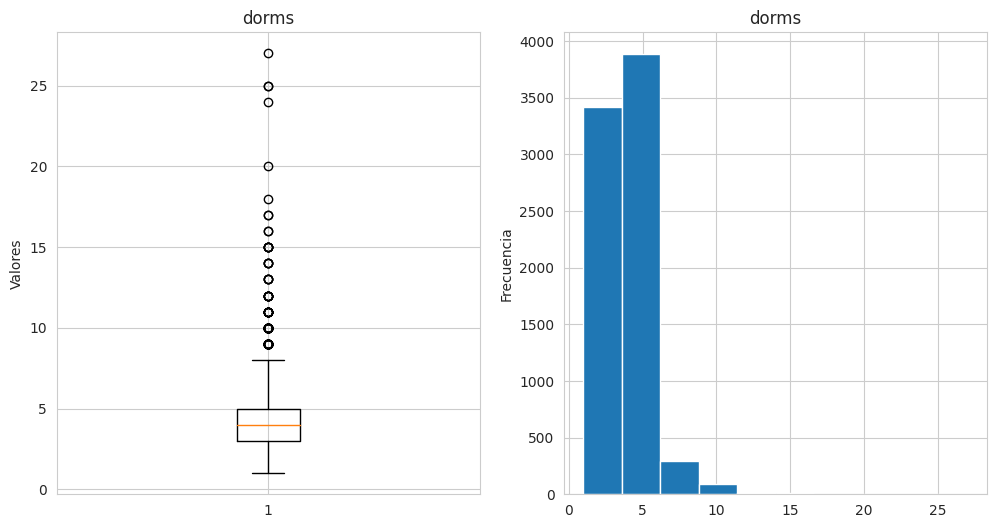

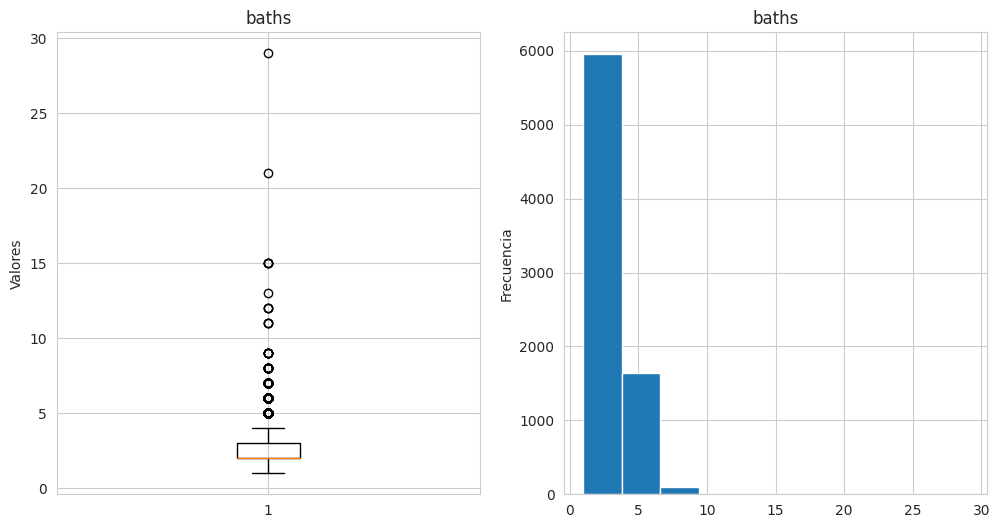

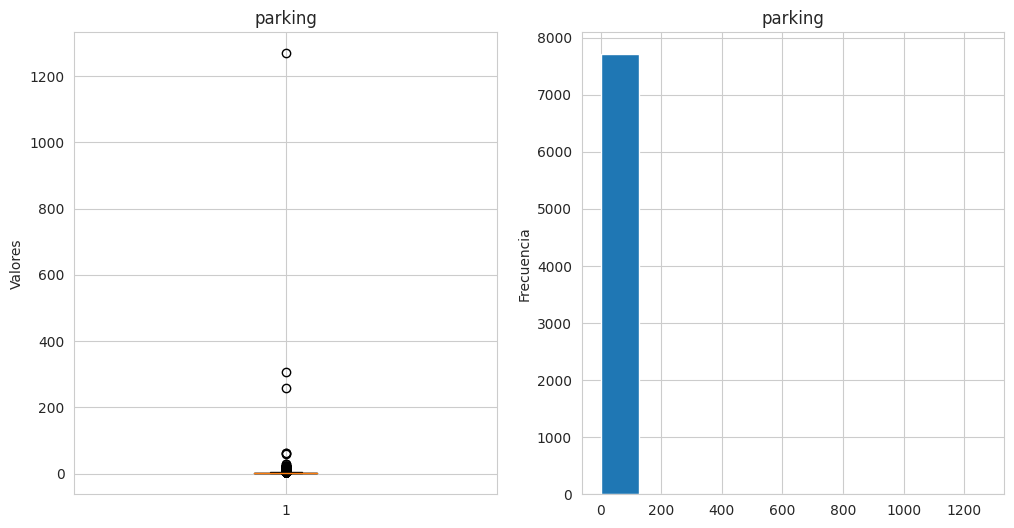

In [25]:
for col in discrete_cols:
    fig, ax = plt.subplots(1, 2, sharey=False, sharex=False, figsize=(12, 6))

    ax[0].boxplot(numeric_cols[col])
    ax[0].set_title(col)
    ax[0].set_ylabel("Valores")

    ax[1].hist(numeric_cols[col])
    ax[1].set_title(col)
    ax[1].set_ylabel("Frecuencia")

    plt.show()

### Eliminar outliers con IQR

In [26]:
df_precio_casas.sort_values(by="parking", ascending=False)

,price_uf,dorms,baths,built area,total area,parking,id,comuna_id
253,26000,11,4.0,567.0,702.0,1269.0,9275128,18
1495,5900,3,2.0,150.0,150.0,307.0,11978650,4
2774,78674,9,4.0,519.0,757.0,257.6,9355997,6
5837,2206,9,2.0,150.0,150.0,62.8,11113492,14
2919,10850,5,3.0,150.0,147.0,62.4,10357478,21
...,...,...,...,...,...,...,...,...
4289,4018,3,1.0,180.0,285.0,1.0,11578915,4
6225,1517,4,1.0,65.0,70.0,1.0,6652770,40
6224,4260,2,3.0,149.0,149.0,1.0,10208306,24
4290,16859,4,3.0,602.0,602.0,1.0,11578900,16


### Identificar y eliminar usando IQR

In [27]:
parkings = df_precio_casas["parking"]

Q1_parkings = parkings.quantile(0.25)
Q3_parkings = parkings.quantile(0.75)
IQR_parkings = Q3_parkings - Q1_parkings

lower_limit_rating = Q1_parkings - 1.5 * IQR_parkings
upper_limit_rating = Q3_parkings + 1.5 * IQR_parkings

outliers_rating = df_precio_casas[(parkings < lower_limit_rating) | (parkings > upper_limit_rating)]

df_precio_casas = df_precio_casas.drop(outliers_rating.index)

In [28]:
baths = df_precio_casas["baths"]

Q1_baths = baths.quantile(0.25)
Q3_baths = baths.quantile(0.75)
IQR_baths = Q3_baths - Q1_baths

lower_limit_rating = Q1_baths - 1.5 * IQR_baths
upper_limit_rating = Q3_baths + 1.5 * IQR_baths

outliers_rating = df_precio_casas[(baths < lower_limit_rating) | (baths > upper_limit_rating)]

df_precio_casas = df_precio_casas.drop(outliers_rating.index)

In [29]:
dorms = df_precio_casas["dorms"]

Q1_dorms = dorms.quantile(0.25)
Q3_dorms = dorms.quantile(0.75)
IQR_dorms = Q3_dorms - Q1_dorms

lower_limit_rating = Q1_dorms - 1.5 * IQR_dorms
upper_limit_rating = Q3_dorms + 1.5 * IQR_dorms

outliers_rating = df_precio_casas[(dorms < lower_limit_rating) | (dorms > upper_limit_rating)]

df_precio_casas = df_precio_casas.drop(outliers_rating.index)

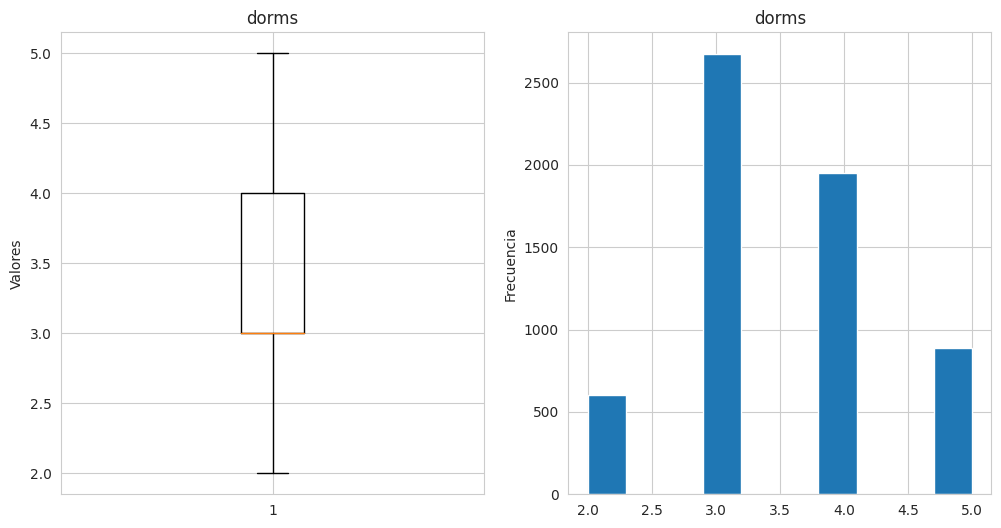

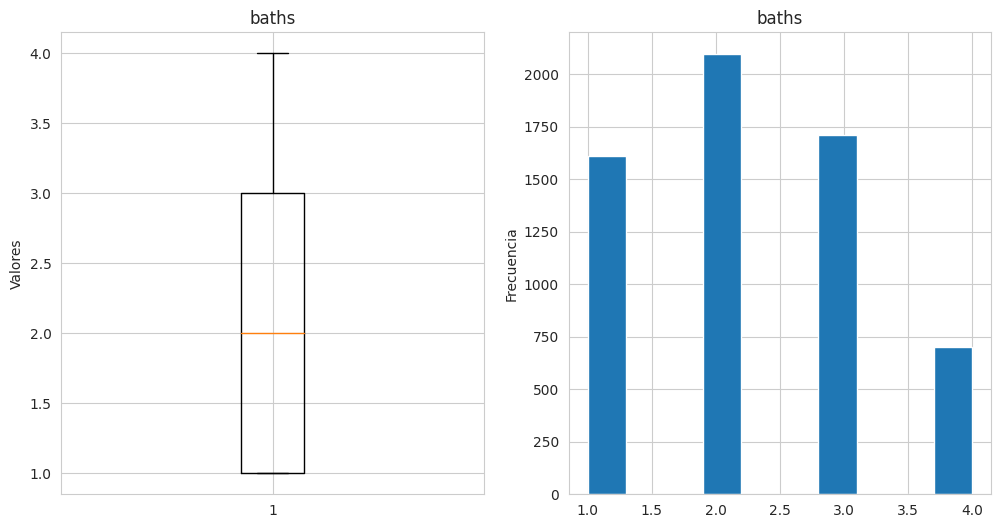

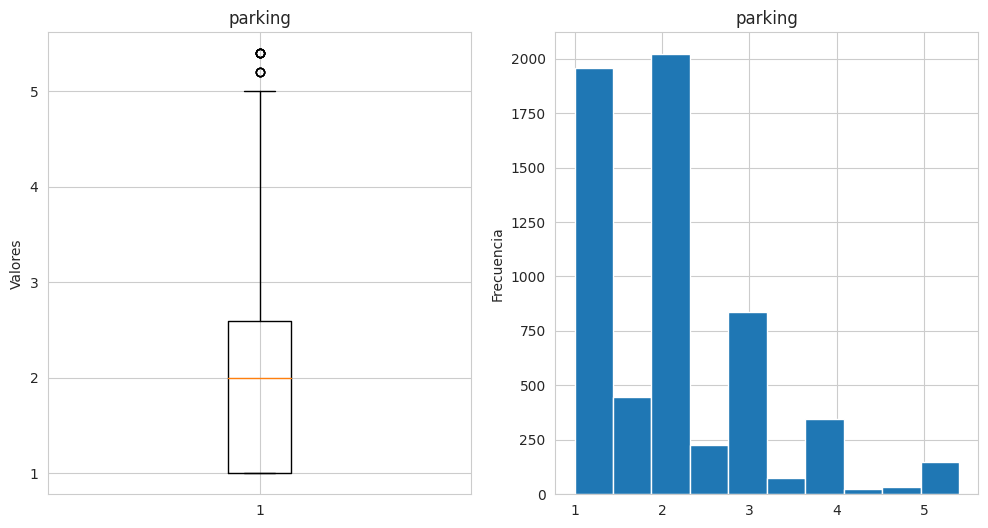

In [30]:
numeric_cols = df_precio_casas.select_dtypes(include=["number"])
numeric_cols.columns

discrete_cols = numeric_cols[
    [
        "dorms",
        "baths",
        "parking",
    ]
]

for col in discrete_cols:
    fig, ax = plt.subplots(1, 2, sharey=False, sharex=False, figsize=(12, 6))

    ax[0].boxplot(numeric_cols[col])
    ax[0].set_title(col)
    ax[0].set_ylabel("Valores")

    ax[1].hist(numeric_cols[col])
    ax[1].set_title(col)
    ax[1].set_ylabel("Frecuencia")

    plt.show()

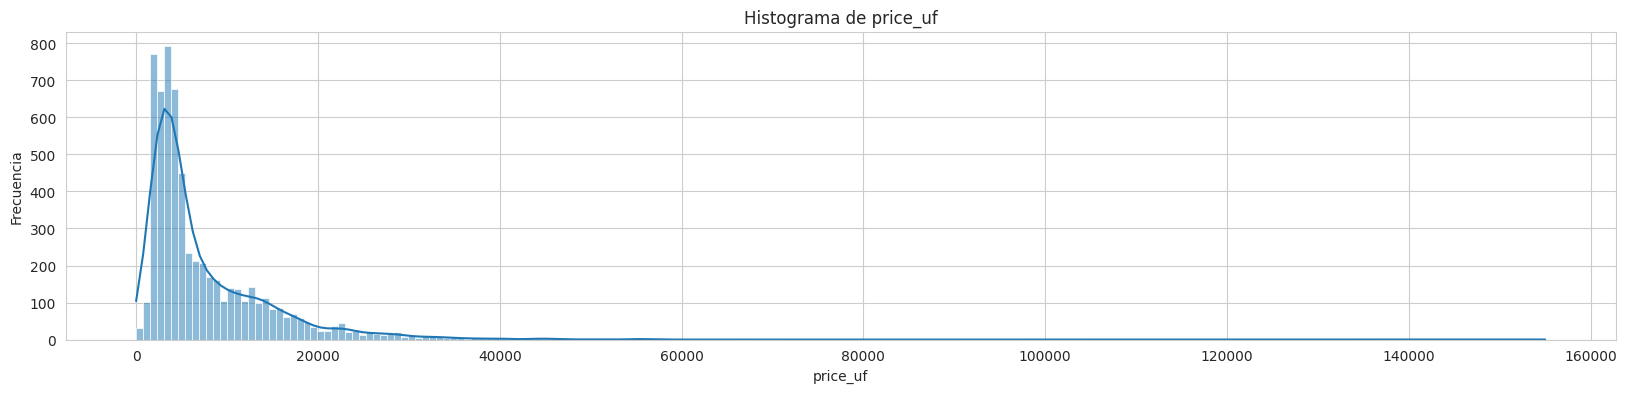

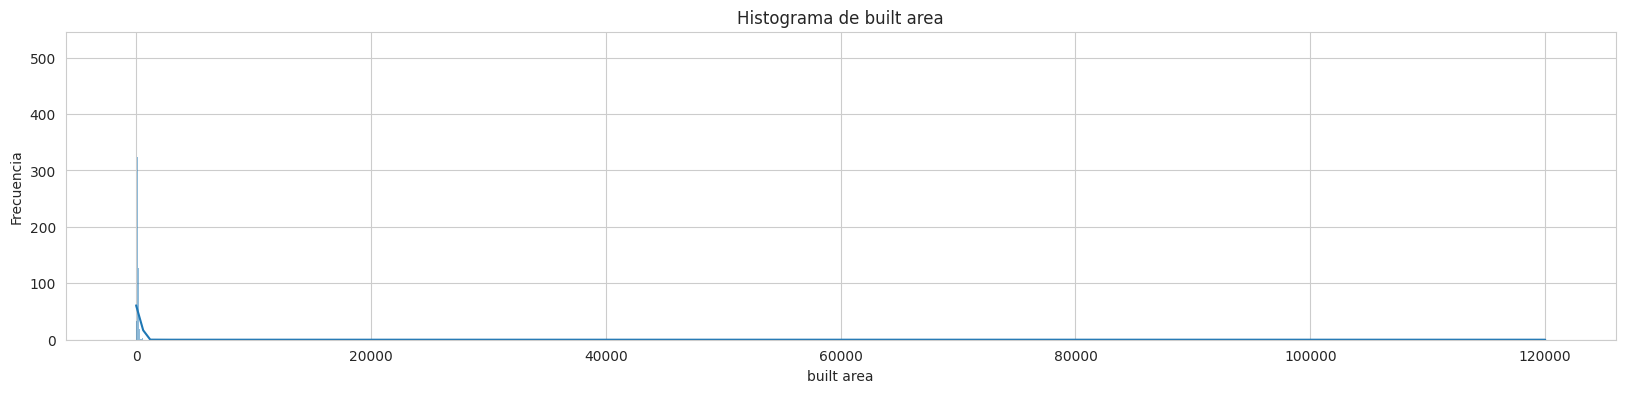

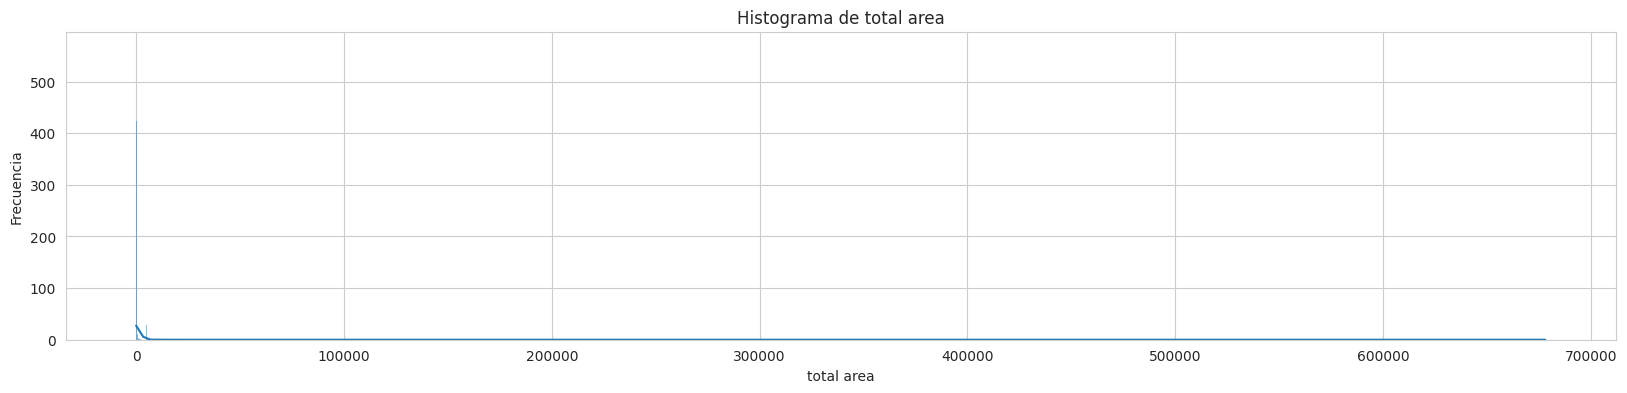

In [31]:
numeric_cols = df_precio_casas.select_dtypes(include=["number"])
numeric_cols.columns

discrete_cols = numeric_cols[
    [
        "price_uf",
        "built area",
        "total area",
    ]
]

for col in discrete_cols:
    plt.figure(figsize=(20, 4))
    sns.histplot(x=df_precio_casas[col], kde=True)
    plt.ticklabel_format(useOffset=False, style="plain")
    plt.xlabel(col)
    plt.ylabel("Frecuencia")
    plt.title(f"Histograma de {col}")
    plt.show()

In [32]:
price_uf = df_precio_casas["price_uf"]

Q1_price_uf = price_uf.quantile(0.25)
Q3_price_uf = price_uf.quantile(0.75)
IQR_price_uf = Q3_price_uf - Q1_price_uf

lower_limit_rating = Q1_price_uf - 1.5 * IQR_price_uf
upper_limit_rating = Q3_price_uf + 1.5 * IQR_price_uf

outliers_rating = df_precio_casas[(price_uf < lower_limit_rating) | (price_uf > upper_limit_rating)]

df_precio_casas = df_precio_casas.drop(outliers_rating.index)

In [33]:
built_area = df_precio_casas["built area"]

Q1_built_area = built_area.quantile(0.25)
Q3_built_area = built_area.quantile(0.75)
IQR_built_area = Q3_built_area - Q1_built_area

lower_limit_rating = Q1_built_area - 1.5 * IQR_built_area
upper_limit_rating = Q3_built_area + 1.5 * IQR_built_area

outliers_rating = df_precio_casas[(built_area < lower_limit_rating) | (built_area > upper_limit_rating)]

df_precio_casas = df_precio_casas.drop(outliers_rating.index)

In [34]:
total_area = df_precio_casas["total area"]

Q1_total_area = total_area.quantile(0.25)
Q3_total_area = total_area.quantile(0.75)
IQR_total_area = Q3_total_area - Q1_total_area

lower_limit_rating = Q1_total_area - 1.5 * IQR_total_area
upper_limit_rating = Q3_total_area + 1.5 * IQR_total_area

outliers_rating = df_precio_casas[(total_area < lower_limit_rating) | (total_area > upper_limit_rating)]

df_precio_casas = df_precio_casas.drop(outliers_rating.index)

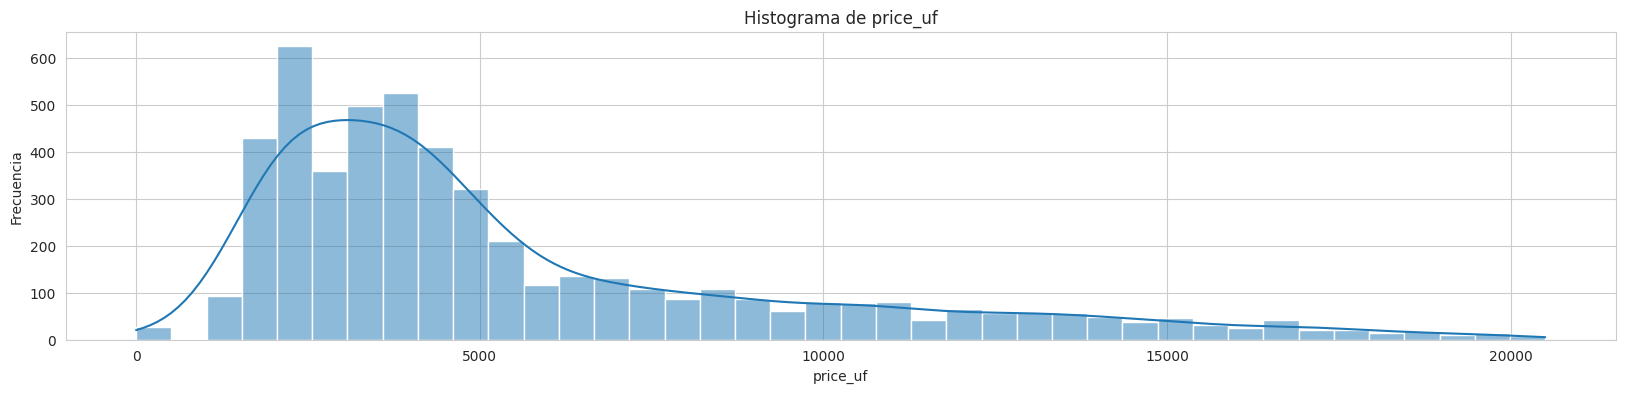

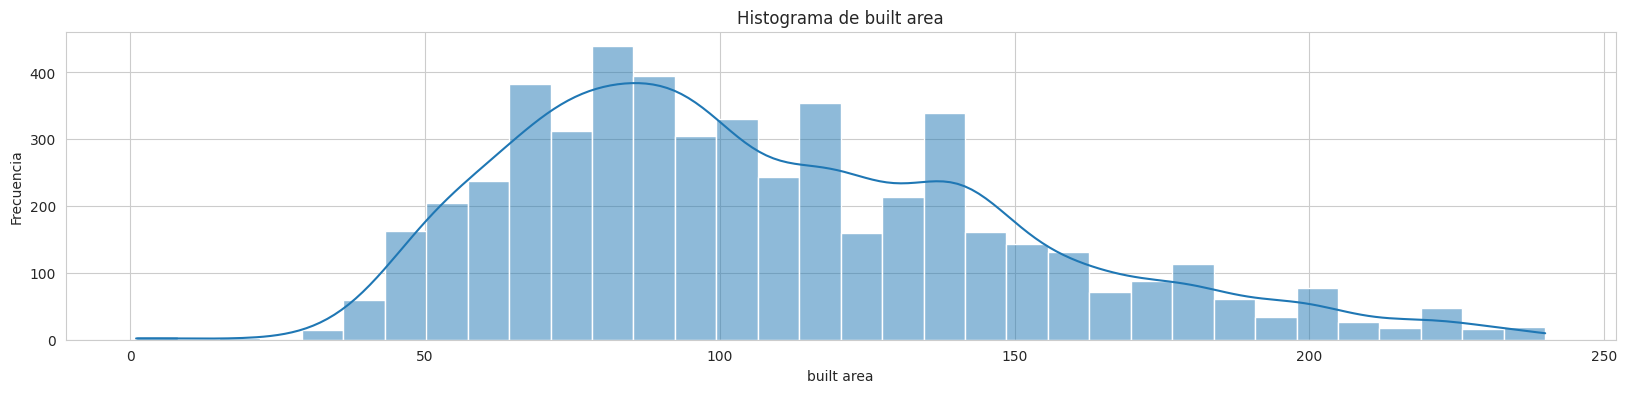

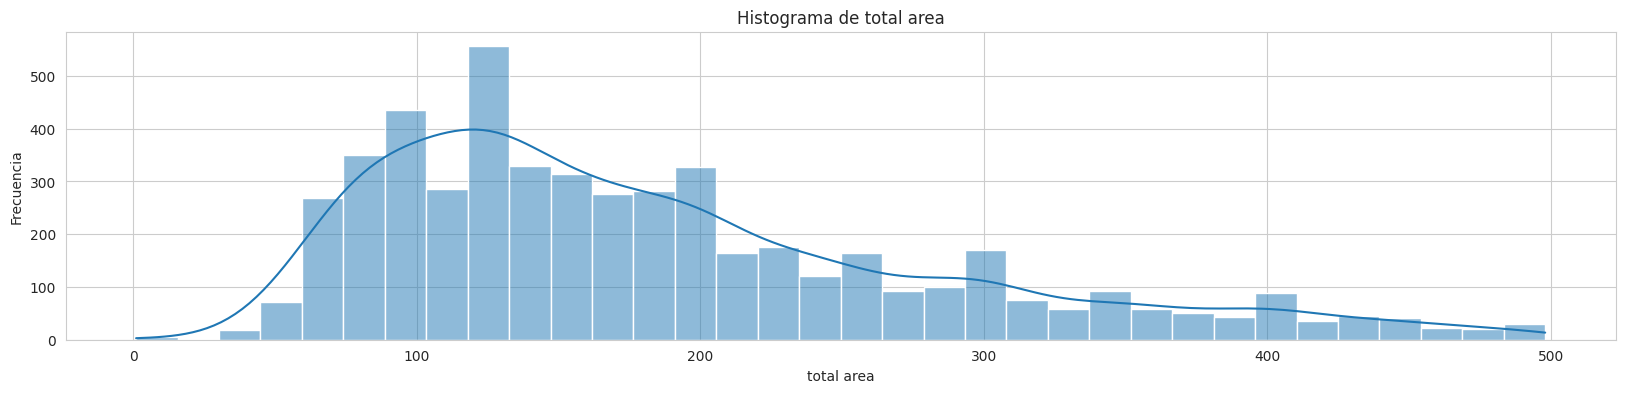

In [35]:
numeric_cols = df_precio_casas.select_dtypes(include=["number"])
numeric_cols.columns

discrete_cols = numeric_cols[
    [
        "price_uf",
        "built area",
        "total area",
    ]
]

for col in discrete_cols:
    plt.figure(figsize=(20, 4))
    sns.histplot(x=df_precio_casas[col], kde=True)
    plt.ticklabel_format(useOffset=False, style="plain")
    plt.xlabel(col)
    plt.ylabel("Frecuencia")
    plt.title(f"Histograma de {col}")
    plt.show()

In [36]:
df_precio_casas.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5169 entries, 1 to 7778
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   price_uf    5169 non-null   int64  
 1   dorms       5169 non-null   int64  
 2   baths       5169 non-null   float64
 3   built area  5169 non-null   float64
 4   total area  5169 non-null   float64
 5   parking     5169 non-null   float64
 6   id          5169 non-null   int64  
 7   comuna_id   5169 non-null   int64  
dtypes: float64(4), int64(4)
memory usage: 363.4 KB


## Resumen Estadístico

In [37]:
from math import ceil

resumen_estadistico = df_precio_casas.describe()
resumen_estadistico['price_uf'] = resumen_estadistico['price_uf'].apply('{:.1f}'.format)
resumen_estadistico['built area'] = resumen_estadistico['built area'].apply('{:.1f}'.format)
resumen_estadistico['total area'] = resumen_estadistico['total area'].apply('{:.1f}'.format)
resumen_estadistico['dorms'] = resumen_estadistico['dorms'].apply(ceil)
resumen_estadistico['baths'] = resumen_estadistico['baths'].apply(ceil)
resumen_estadistico['parking'] = resumen_estadistico['parking'].apply(ceil)
resumen_estadistico

,price_uf,dorms,baths,built area,total area,parking,id,comuna_id
count,5169.0,5169,5169,5169.0,5169.0,5169,5.169000e+03,5169.000000
mean,5620.8,4,3,108.1,185.3,2,9.905502e+06,20.833817
std,4067.0,1,1,42.0,99.8,1,1.921065e+06,10.133190
min,0.0,2,1,1.0,1.0,1,2.003240e+06,0.000000
25%,2700.0,3,1,76.0,110.0,1,8.647744e+06,13.000000
50%,4150.0,3,2,100.0,160.0,2,1.037161e+07,21.000000
75%,7193.0,4,3,137.0,239.0,2,1.143608e+07,28.000000
max,20500.0,5,4,240.0,498.0,5,1.234116e+07,50.000000


### Coeficientes de Asimetría

In [38]:
numeric_cols = df_precio_casas.select_dtypes(include=["number"])
numeric_cols.columns

discrete_cols = numeric_cols[
    [
        "dorms",
        "baths",
        "parking",
    ]
]
from scipy.stats import skew

for col in discrete_cols:
    print(f"Coeficiente de asimetría (skew) para la {col}: {round(skew(numeric_cols[col]), 2)}.")

Coeficiente de asimetría (skew) para la dorms: 0.28.
Coeficiente de asimetría (skew) para la baths: 0.33.
Coeficiente de asimetría (skew) para la parking: 1.04.


In [39]:
continuos_cols = numeric_cols[[
    "price_uf",
    "built area",
    "total area"
]]

from scipy.stats import skew

for col in continuos_cols:
    print(f"Coeficiente de asimetría (skew) para la {col}: {round(skew(numeric_cols[col]), 2)}.")

Coeficiente de asimetría (skew) para la price_uf: 1.42.
Coeficiente de asimetría (skew) para la built area: 0.68.
Coeficiente de asimetría (skew) para la total area: 1.01.


### Matriz de Correlación

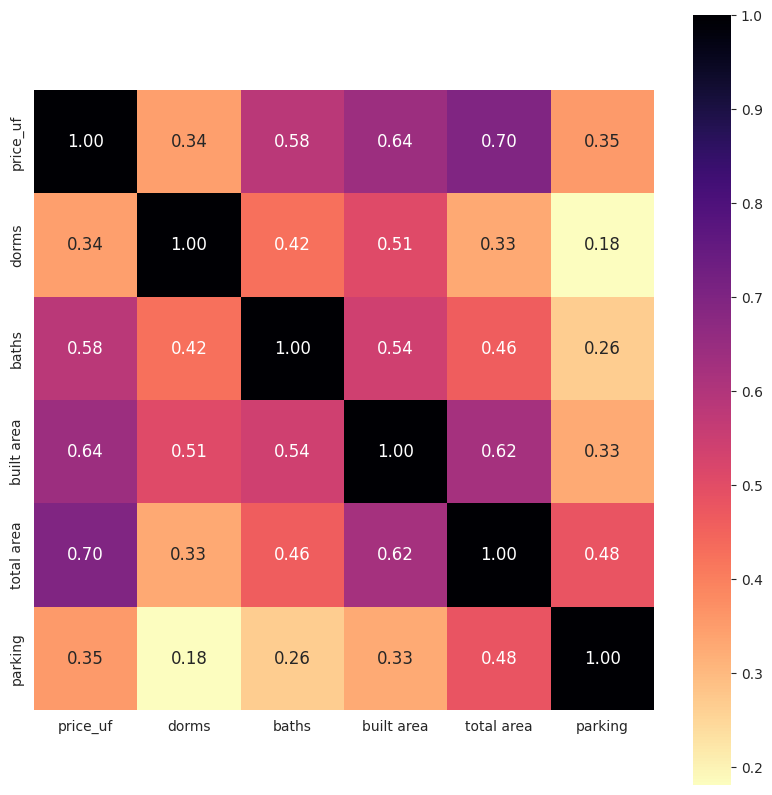

In [40]:
from sklearn.preprocessing import StandardScaler

cols = ["price_uf", "dorms", "baths", "built area", "total area", "parking"]

scaler = StandardScaler()
scaled = scaler.fit_transform(df_precio_casas[cols])
scaled.T

covariance_matrix = np.cov(scaled.T)
covariance_matrix

plt.figure(figsize=(10, 10))
hm = sns.heatmap(
    covariance_matrix,
    cbar=True,
    annot=True,
    square=True,
    fmt=".2f",
    annot_kws={"size": 12},
    yticklabels=cols,
    xticklabels=cols,
    cmap="magma_r"
)
plt.show()

### Gráficos de dispersión para las variables con mayor correlación positiva

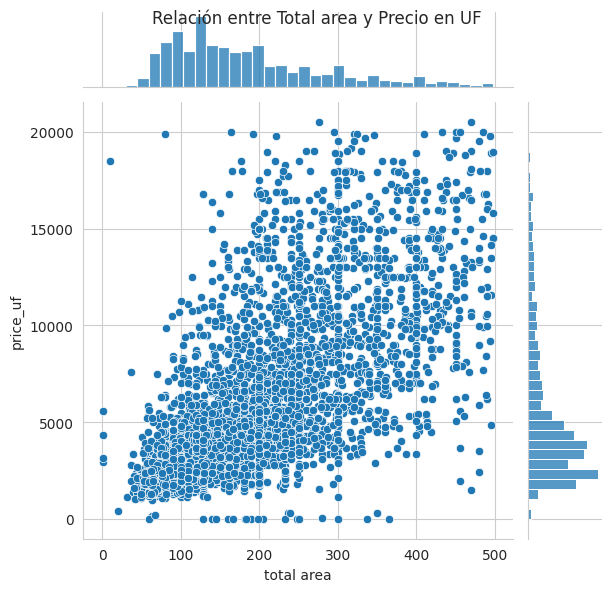

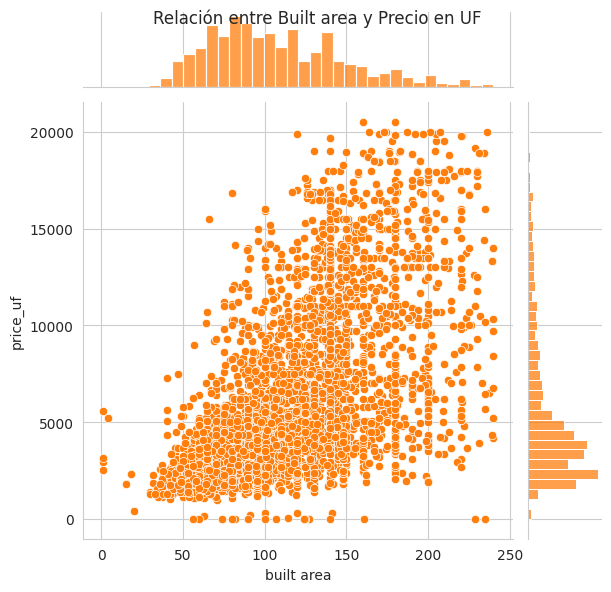

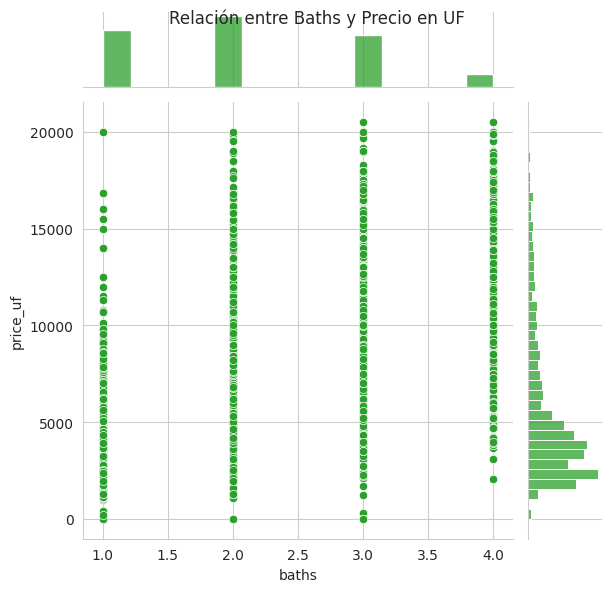

In [41]:
cols = ["total area", "built area", "baths"]
colors_list = ["tab:blue", "tab:orange", "tab:green"]

for index, col in enumerate(cols):
    sns.jointplot(x= df_precio_casas[col], y=df_precio_casas["price_uf"], color=colors_list[index])
    plt.suptitle(f"Relación entre {col.capitalize()} y Precio en UF")
    plt.show()

In [42]:
df_comunas["comuna_id"] = df_comunas["index"]

In [43]:
df_precio_casas_rm = pd.merge(df_precio_casas, df_comunas, on="comuna_id", how="inner")

In [44]:
df_precio_casas_rm = df_precio_casas_rm.drop(columns=["comuna_id", "index"])

In [45]:
df_precio_casas_rm = df_precio_casas_rm.rename(columns={"Comuna":"comuna", "Ubicación":"zona geografica"})

## Análisis Descriptivo

### Top 10 de comunas que acumulan la mayor cantidad de propiedades en venta

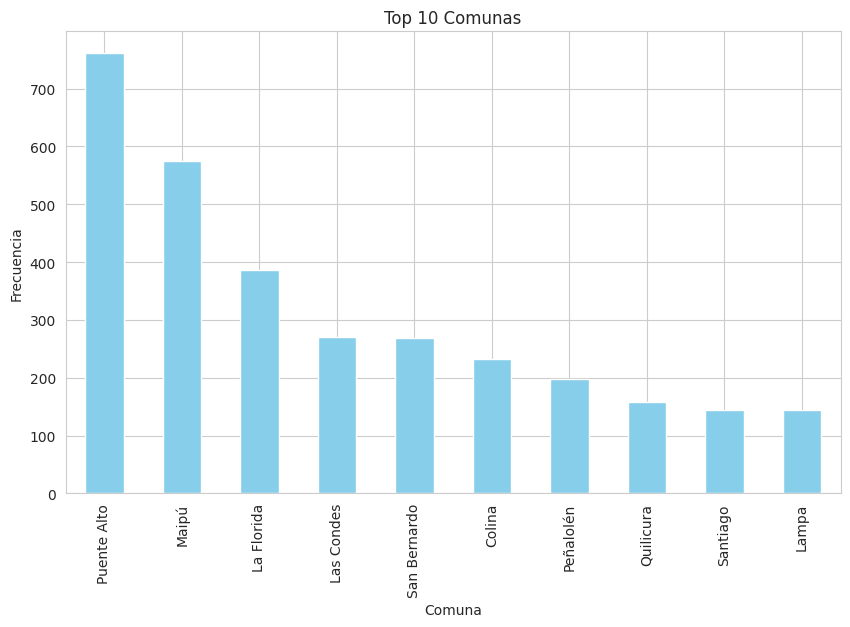

In [46]:
top_10_comunas = df_precio_casas_rm["comuna"].value_counts(ascending=False)[:10]

plt.figure(figsize=(10, 6))
top_10_comunas.plot(kind='bar', color='skyblue')
plt.title('Top 10 Comunas')
plt.xlabel('Comuna')
plt.ylabel('Frecuencia')
plt.show()

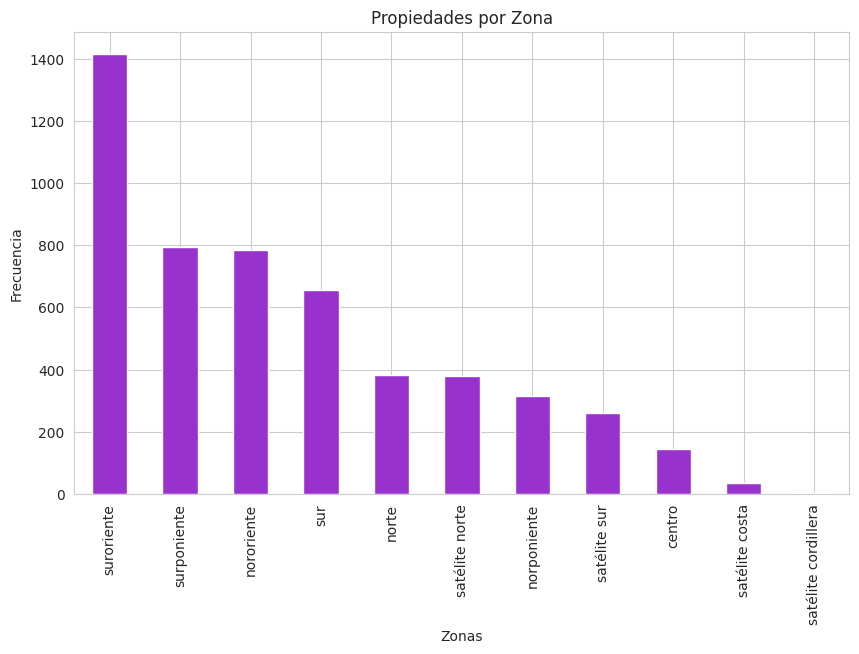

In [47]:
frecuencia_por_zona = df_precio_casas_rm["zona geografica"].value_counts(ascending=False)

plt.figure(figsize=(10, 6))
frecuencia_por_zona.plot(kind='bar', color='darkorchid')
plt.title('Propiedades por Zona')
plt.xlabel('Zonas')
plt.ylabel('Frecuencia')
plt.show()

In [48]:
price_format = lambda x: "UF {:,.0f}".format(x).replace(",", ".")

In [49]:
numeric_col = "price_uf"
categoric_col = "zona geografica"
measure = "mean"

group = df_precio_casas_rm[[categoric_col,numeric_col]].groupby(by=categoric_col)
mean_gruop = group.agg(measure)
numeric_col_sort = mean_gruop.sort_values(by=numeric_col, ascending=False)
numeric_col_sort[numeric_col] = numeric_col_sort[numeric_col].apply(price_format)
numeric_col_sort

,price_uf
zona geografica,
nororiente,UF 12.249
satélite norte,UF 6.099
centro,UF 5.534
norte,UF 5.026
suroriente,UF 4.708
norponiente,UF 3.901
surponiente,UF 3.886
satélite sur,UF 3.645
sur,UF 3.626


In [50]:
numeric_col = "price_uf"
categoric_col = "comuna"
measure = "mean"

group = df_precio_casas_rm[[categoric_col,numeric_col]].groupby(by=categoric_col)
mean_gruop = group.agg(measure)
numeric_col_sort = mean_gruop.sort_values(by=numeric_col, ascending=False)
numeric_col_sort[numeric_col] = numeric_col_sort[numeric_col].apply(price_format)
numeric_col_sort

,price_uf
comuna,
Vitacura,UF 14.887
Lo Barnechea,UF 13.692
Las Condes,UF 13.348
Providencia,UF 11.576
La Reina,UF 11.056
Ñuñoa,UF 9.048
Peñalolén,UF 8.097
Colina,UF 7.824
San Miguel,UF 7.447


In [51]:
numeric_col = "dorms"
categoric_col = "zona geografica"
measure = "mean"

group = df_precio_casas_rm[[categoric_col,numeric_col]].groupby(by=categoric_col)
mean_gruop = group.agg(measure)
numeric_col_sort = mean_gruop.sort_values(by=numeric_col, ascending=False)
numeric_col_sort[numeric_col] = numeric_col_sort[numeric_col].apply('{:.0f}'.format)
numeric_col_sort

,dorms
zona geografica,
satélite cordillera,4
nororiente,4
centro,4
norte,3
norponiente,3
suroriente,3
surponiente,3
sur,3
satélite costa,3


In [52]:
numeric_col = "baths"
categoric_col = "zona geografica"
measure = "mean"

group = df_precio_casas_rm[[categoric_col,numeric_col]].groupby(by=categoric_col)
mean_gruop = group.agg(measure)
numeric_col_sort = mean_gruop.sort_values(by=numeric_col, ascending=False)
numeric_col_sort[numeric_col] = numeric_col_sort[numeric_col].apply('{:.0f}'.format)
numeric_col_sort

,baths
zona geografica,
nororiente,3
satélite norte,2
norte,2
suroriente,2
satélite sur,2
centro,2
surponiente,2
norponiente,2
sur,2


In [53]:
df_uf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495 entries, 0 to 494
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Fecha   495 non-null    object 
 1   Valor   495 non-null    float64
dtypes: float64(1), object(1)
memory usage: 7.9+ KB


In [54]:
df_uf["Fecha"].min()

'2023-01-01'

In [55]:
df_uf["Fecha"].max()

'2024-05-09'

In [56]:
semestre_1_2023 = df_uf[df_uf["Fecha"].between('2023-01-01', '2023-06-31')]
valor_uf_S1_2023 = semestre_1_2023["Valor"].mean().round(2)

In [57]:
semestre_2_2023 = df_uf[df_uf["Fecha"].between('2023-07-01', '2023-12-31')]
valor_uf_S2_2023 = semestre_2_2023["Valor"].mean().round(2)

In [58]:
semestre_1_2024 = df_uf[df_uf["Fecha"].between('2024-01-01', '2024-06-31')]
valor_uf_S1_2024 = semestre_1_2024["Valor"].mean().round(2)

In [59]:
df_precio_casas_rm_sem1_2023 = df_precio_casas_rm
df_precio_casas_rm_sem1_2023["price_clp"] = df_precio_casas_rm_sem1_2023["price_uf"] * valor_uf_S1_2023

In [60]:
price_clp_1 = "price_clp"
categoric_col = "zona geografica"
measure = "mean"

group = df_precio_casas_rm_sem1_2023[[categoric_col,price_clp_1]].groupby(by=categoric_col)
mean_gruop = group.agg(measure)
price_clp_1_sort = mean_gruop.sort_values(by=price_clp_1, ascending=False)
price_clp_1_sort

,price_clp
zona geografica,
nororiente,4.366775e+08
satélite norte,2.174186e+08
centro,1.973080e+08
norte,1.791897e+08
suroriente,1.678404e+08
norponiente,1.390890e+08
surponiente,1.385276e+08
satélite sur,1.299462e+08
sur,1.292642e+08


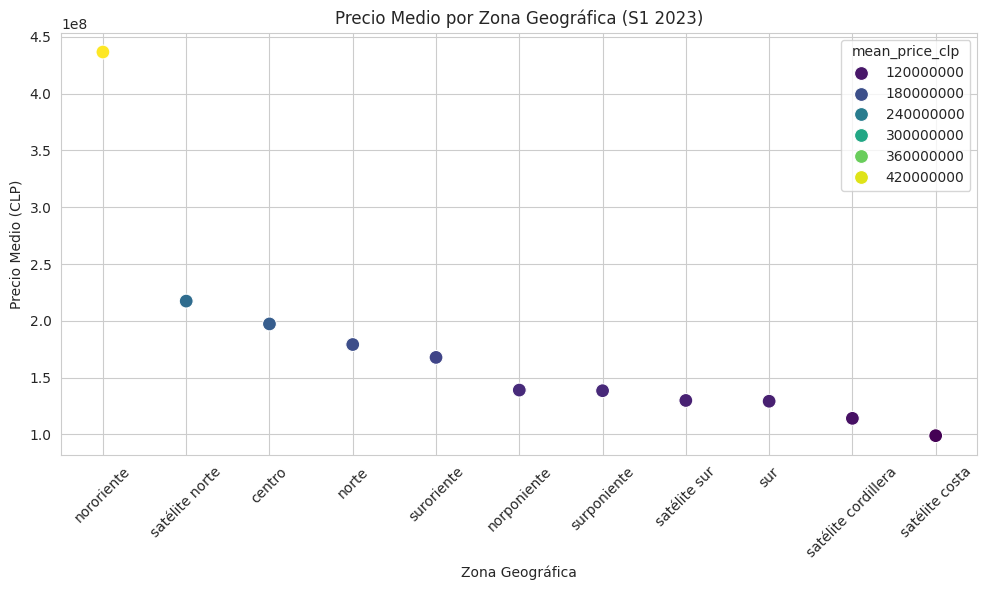

In [61]:
df_mean_zona_s1_2023 = pd.DataFrame(
    {
        "zona geografica": price_clp_1_sort.index.to_list(),
        "mean_price_clp": list(price_clp_1_sort["price_clp"].values),
    }
)

plt.figure(figsize=(10, 6))

sns.scatterplot(data=df_mean_zona_s1_2023, x="zona geografica", y="mean_price_clp", hue="mean_price_clp", palette="viridis", s=100)

plt.title('Precio Medio por Zona Geográfica (S1 2023)')
plt.xlabel('Zona Geográfica')
plt.ylabel('Precio Medio (CLP)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


In [62]:
df_precio_casas_rm_sem2_2023 = df_precio_casas_rm
df_precio_casas_rm_sem2_2023["price_clp"] = df_precio_casas_rm_sem2_2023["price_uf"] * valor_uf_S2_2023

In [76]:
price_clp_2_sort = "price_clp"
categoric_col = "zona geografica"
measure = "mean"

group = df_precio_casas_rm_sem2_2023[[categoric_col,price_clp_2_sort]].groupby(by=categoric_col)
mean_gruop = group.agg(measure)
price_clp_2_sort = mean_gruop.sort_values(by=price_clp_2_sort, ascending=False)
price_clp_2_sort.head(30)

,price_clp
zona geografica,
nororiente,4.526799e+08
satélite norte,2.253861e+08
centro,2.045385e+08
norte,1.857562e+08
suroriente,1.739910e+08
norponiente,1.441860e+08
surponiente,1.436041e+08
satélite sur,1.347082e+08
sur,1.340012e+08


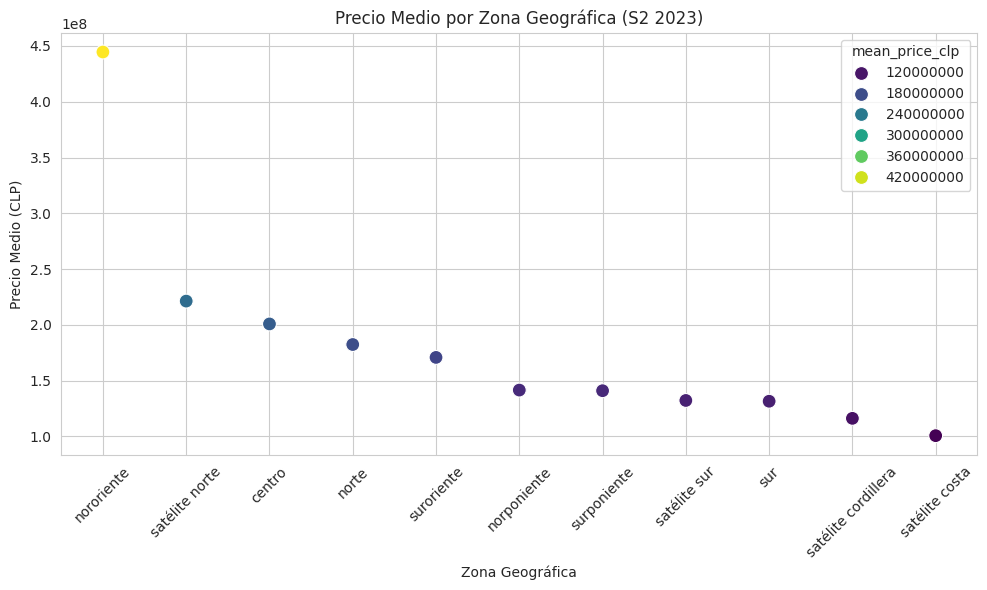

In [64]:

df_mean_zona_s2_2023 = pd.DataFrame(
    {
        "zona geografica": price_clp_2_sort.index.to_list(),
        "mean_price_clp": price_clp_2_sort["price_clp"].values,
    }
)
plt.figure(figsize=(10, 6))

sns.scatterplot(data=df_mean_zona_s2_2023, x="zona geografica", y="mean_price_clp", hue="mean_price_clp", palette="viridis", s=100)

plt.title('Precio Medio por Zona Geográfica (S2 2023)')
plt.xlabel('Zona Geográfica')
plt.ylabel('Precio Medio (CLP)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [65]:
df_precio_casas_rm_sem1_2024 = df_precio_casas_rm
df_precio_casas_rm_sem1_2024["price_clp"] = df_precio_casas_rm_sem1_2024["price_uf"] * valor_uf_S1_2024

In [66]:
price_clp_3 = "price_clp"
categoric_col = "zona geografica"
measure = "mean"

group = df_precio_casas_rm_sem1_2024[[categoric_col,price_clp_3]].groupby(by=categoric_col)
mean_gruop = group.agg(measure)
price_clp_3_sort = mean_gruop.sort_values(by=price_clp_3, ascending=False)
price_clp_3_sort

,price_clp
zona geografica,
nororiente,4.526799e+08
satélite norte,2.253861e+08
centro,2.045385e+08
norte,1.857562e+08
suroriente,1.739910e+08
norponiente,1.441860e+08
surponiente,1.436041e+08
satélite sur,1.347082e+08
sur,1.340012e+08


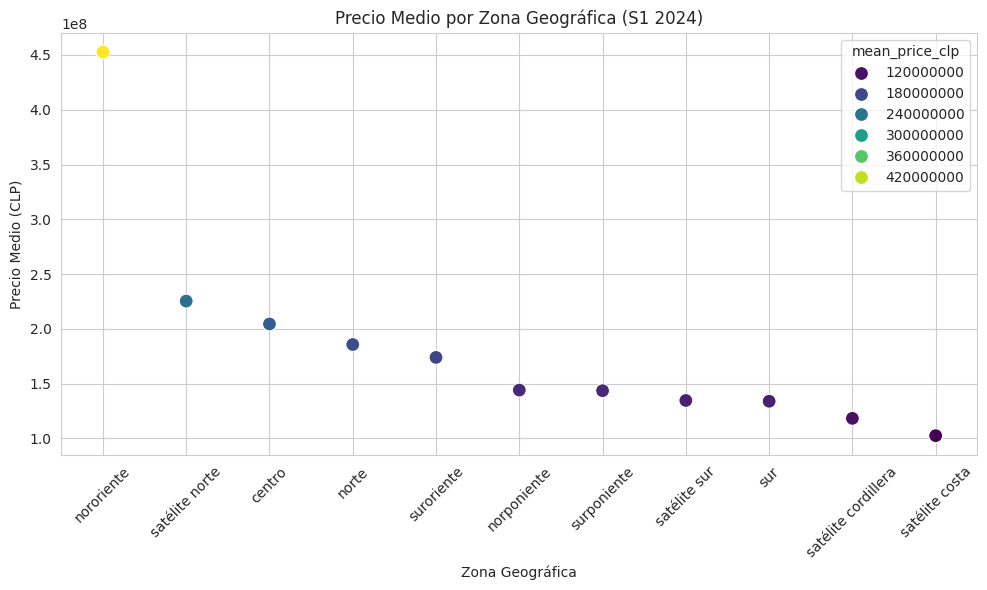

In [67]:

df_mean_zona_s2_2023 = pd.DataFrame(
    {
        "zona geografica": price_clp_3_sort.index.to_list(),
        "mean_price_clp": price_clp_3_sort["price_clp"].values,
    }
)
plt.figure(figsize=(10, 6))

sns.scatterplot(data=df_mean_zona_s2_2023, x="zona geografica", y="mean_price_clp", hue="mean_price_clp", palette="viridis", s=100)

plt.title('Precio Medio por Zona Geográfica (S1 2024)')
plt.xlabel('Zona Geográfica')
plt.ylabel('Precio Medio (CLP)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

## Conclusiones: Análisis del Mercado Inmobiliario en la Región

**Conclusiones: Análisis del Mercado Inmobiliario en la Región**

Tras el análisis realizado, se han obtenido conclusiones relevantes acerca del mercado inmobiliario en la región. A continuación, se presentan los hallazgos más destacados:

1. **Oferta de Propiedades:**
   - Las áreas con mayor oferta de propiedades son el sector suroriente, surponiente y nororiente.
   - Resulta sorprendente que ninguna de estas áreas sea la más asequible en términos de precios. De hecho, dos de ellas se encuentran entre las más costosas.

2. **Equilibrio entre Precio y Oferta:**
   - El sector suroriente emerge como un punto de equilibrio, liderando en oferta de propiedades y ubicándose en una posición intermedia en términos de precios más accesibles. Esto lo convierte en una opción interesante para aquellos que buscan una combinación adecuada de precio y disponibilidad. Se suman a este comportamiento el sector suroriente y el nororiente.

3. **Correlaciones Relevantes:**
   - Se observa una correlación alta a moderada entre el área total, el área construida, la cantidad de baños y el precio de las propiedades.

4. **Comunas Destacadas:**
   - Vitacura, Lo Barnechea y Las Condes, ubicadas en el sector nororiente, son las comunas con los precios más elevados, destacándose como el sector con el precio promedio más alto. Vitacura es la comuna con los precios más altos.
   - El Monte, Paine y Talagante, pertenecientes al sector satélite costa, son las comunas más asequibles en este sector.
   - A pesar de no pertenecer al sector más económico, La Pintana es la comuna con los precios más bajos.

5. **Zona Satélite:**
   - En general, las zonas satélite son las más asequibles, con la excepción de la zona satélite norte, que se encuentra entre las más costosas.

## Machine Learning Model



### Model with encoded categorical columns

In [68]:
df_precio_casas.sample(10)

,price_uf,dorms,baths,built area,total area,parking,id,comuna_id
7491,4074,3,1.0,121.6,256.0,2.0,9716755,17
6693,8300,2,2.0,102.0,103.0,2.0,10743852,18
5250,3934,5,2.0,70.0,101.0,1.4,8479484,17
1906,3597,4,3.0,98.0,105.0,1.0,11808852,29
7083,3392,4,2.0,115.0,115.0,2.0,8955773,29
6181,16470,4,3.0,133.0,247.0,2.0,8093313,22
7606,8570,3,1.0,103.0,346.0,1.0,10564323,21
6837,5328,3,3.0,116.0,128.0,1.0,11016833,17
1422,4910,3,3.0,94.0,140.0,1.0,11988434,25
6829,4500,4,3.0,96.0,148.0,1.0,10154365,24


In [69]:
df_precio_casas_rm_v2 = df_precio_casas_rm.drop(columns=["id", "price_clp"])

In [70]:
df_precio_casas_rm_v2.sample(10)

,price_uf,dorms,baths,built area,total area,parking,comuna,zona geografica
2169,1321,4,1.0,80.0,95.0,3.0,Puente Alto,suroriente
3733,4998,2,2.0,108.0,271.0,2.0,Padre Hurtado,surponiente
3992,1545,3,2.0,65.0,90.0,1.0,Peñaflor,satélite sur
1395,5950,3,3.0,98.0,197.0,2.0,San Bernardo,sur
1038,2840,3,2.0,66.0,90.0,1.0,Maipú,surponiente
818,2440,3,2.0,65.0,60.0,1.0,Maipú,surponiente
5094,3512,4,2.0,180.0,200.0,1.0,San Joaquín,sur
4252,16800,5,4.0,140.0,488.0,3.2,Las Condes,nororiente
1321,2248,4,3.0,147.8,232.6,2.0,San Bernardo,sur
1787,1545,3,2.0,80.0,79.0,2.0,Puente Alto,suroriente


In [80]:
import xgboost as xgb
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Cargar el conjunto de datos
X = df_precio_casas_rm_v2.drop(columns="price_uf")
y = df_precio_casas_rm_v2.price_uf

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Definir las columnas que son categóricas y numéricas
categorical_columns = [5, 6]

In [81]:
# Crear un transformador para las características categóricas usando OneHotEncoder
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combinar transformadores para preprocesamiento
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_columns)
    ])

# Crear el pipeline con preprocesamiento y modelo XGBoost
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', xgb.XGBRegressor())
])

In [82]:
# Entrenar el modelo
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

In [83]:
# Calcula el Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

# Calcula el Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Root Mean Squared Error (RMSE):", rmse)

# Calcula el Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

# Calcula el coeficiente de determinación (R-squared)
r2 = r2_score(y_test, y_pred)
print("R-squared (R2):", r2)


Mean Squared Error (MSE): 6568767.985398174
Root Mean Squared Error (RMSE): 2562.9607849903155
Mean Absolute Error (MAE): 1856.8251669789652
R-squared (R2): 0.5851319219892763


### Model without categorical columns

In [100]:
df_precio_casas.sample(10)

,price_uf,dorms,baths,built area,total area,parking,id,comuna_id
5999,2669,2,1.0,70.0,100.0,1.0,11484336,8
1790,3315,3,3.0,120.0,190.0,2.0,11428654,29
5491,3372,2,2.0,84.0,171.0,2.2,9025852,8
1801,2810,2,1.0,90.0,90.0,2.0,11891388,1
5118,1545,3,1.0,43.0,95.0,1.6,11534712,24
1606,9834,4,2.0,143.0,348.0,2.0,11950631,13
260,11000,3,2.0,122.0,226.0,2.0,12326876,12
806,10890,5,3.0,190.0,290.0,2.0,12190093,21
2101,3512,3,2.0,125.0,112.0,1.0,11710597,10
446,7700,4,3.0,147.8,232.6,2.0,12279992,24


In [101]:
df_precio_casas_v2 = df_precio_casas.drop(columns=["id", "comuna_id"])

In [102]:
# Cargar el conjunto de datos
X = df_precio_casas_v2.drop(columns="price_uf")
y = df_precio_casas_v2["price_uf"]

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [103]:
# Crear el modelo
model_ = xgb.XGBRegressor()

# Entrenar el modelo
model_.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model_.predict(X_test)

In [104]:
# Calcula el Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

# Calcula el Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Root Mean Squared Error (RMSE):", rmse)

# Calcula el Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

# Calcula el coeficiente de determinación (R-squared)
r2 = r2_score(y_test, y_pred)
print("R-squared (R2):", r2)

Mean Squared Error (MSE): 6460678.06004894
Root Mean Squared Error (RMSE): 2541.786391506757
Mean Absolute Error (MAE): 1635.1043439086677
R-squared (R2): 0.6010683220188147


In [105]:
# prompt: dump the last model using joblib

import joblib

model_file_name = 'model.joblib'
joblib.dump(model_, model_file_name)


['model.joblib']

In [112]:
for col in df_precio_casas_v2.columns:
    print(f"Mínimo: {col} -> {df_precio_casas_v2[col].min()}")
    print(f"Máximo: {col} -> {df_precio_casas_v2[col].max()}")


Mínimo: price_uf -> 0
Máximo: price_uf -> 20500
Mínimo: dorms -> 2
Máximo: dorms -> 5
Mínimo: baths -> 1.0
Máximo: baths -> 4.0
Mínimo: built area -> 1.0
Máximo: built area -> 240.0
Mínimo: total area -> 1.0
Máximo: total area -> 498.0
Mínimo: parking -> 1.0
Máximo: parking -> 5.0
